In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import requests
from bs4 import BeautifulSoup
import re

df = pd.read_csv("UsableHousePriceData.csv")
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [2]:
def dollor2toman(x):
    r = requests.get('https://www.tgju.org/')
    soup = BeautifulSoup(r.text, 'html.parser')
    results = soup.find('tr', attrs = {'data-market-row' : 'price_dollar_rl'})
    dollorPrice=results.find('td', attrs = {'class' : 'nf'})
    dollorPrice=re.sub(r"[^\d]", "", dollorPrice.text)
    dollarBeToman=int(dollorPrice[:-1])
    return x * dollarBeToman

In [3]:
df['Area']

0        63
1        60
2        79
3        95
4       123
       ... 
3445     86
3446     83
3447     75
3448    105
3449     82
Name: Area, Length: 3450, dtype: int64

In [4]:
df.loc[df['Parking'] == False, 'Parking'] = 0
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3445,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3446,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3447,75,2,0,False,False,Parand,3.650000e+08,12166.67
3448,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [5]:
df.loc[df['Parking'] == True, 'Parking'] = 1
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,True,True,Shahran,1.850000e+09,61666.67
1,60,1,1,True,True,Shahran,1.850000e+09,61666.67
2,79,2,1,True,True,Pardis,5.500000e+08,18333.33
3,95,2,1,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3445,86,2,1,True,True,Southern Janatabad,3.500000e+09,116666.67
3446,83,2,1,True,True,Niavaran,6.800000e+09,226666.67
3447,75,2,0,False,False,Parand,3.650000e+08,12166.67
3448,105,2,1,True,True,Dorous,5.600000e+09,186666.67


In [6]:
df.loc[df['Warehouse'] == True, 'Warehouse'] = 1
df.loc[df['Warehouse'] == False, 'Warehouse'] = 0
df.loc[df['Elevator'] == True, 'Elevator'] = 1
df.loc[df['Elevator'] == False, 'Elevator'] = 0
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3445,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3446,83,2,1,1,1,Niavaran,6.800000e+09,226666.67
3447,75,2,0,0,0,Parand,3.650000e+08,12166.67
3448,105,2,1,1,1,Dorous,5.600000e+09,186666.67


In [7]:
def boxplot_sorted(df, by, column, rot=0):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values()
    return df2[meds.index]
df_2 = boxplot_sorted(df, by = ['Address'], column = 'Price(USD)')
#df_2

In [8]:
x = 0
area2num= dict()
for col in df_2.columns:
    area2num[col] = x
    df=df.replace(to_replace=col, value=x, inplace=False,
                  limit=None, regex=False, method='pad')
    x += 1

In [9]:
area2num

{'Malard': 0,
 'Robat Karim': 1,
 'Pishva': 2,
 'Parand': 3,
 'Shahedshahr': 4,
 'Firoozkooh': 5,
 'Hassan Abad': 6,
 'Vahidiyeh': 7,
 'Qarchak': 8,
 'Baghestan': 9,
 'Ghiyamdasht': 10,
 'Naziabad': 11,
 'Alborz Complex': 12,
 'Pardis': 13,
 'Shahrake Quds': 14,
 'Khavaran': 15,
 'Salehabad': 16,
 'Firoozkooh Kuhsar': 17,
 'Chahardangeh': 18,
 'Telecommunication': 19,
 'Baqershahr': 20,
 'Thirteen November': 21,
 'Shahrake Madaen': 22,
 'Fallah': 23,
 'Nasim Shahr': 24,
 'Pakdasht': 25,
 'Pakdasht KhatunAbad': 26,
 'Aliabad South': 27,
 'Northern Chitgar': 28,
 'Shahrake Qods': 29,
 'Shadabad': 30,
 'Safadasht': 31,
 'Andisheh': 32,
 'Ray - Pilgosh': 33,
 'Shahryar': 34,
 'Yakhchiabad': 35,
 'Beryanak': 36,
 'Kahrizak': 37,
 'Abuzar': 38,
 'Shoosh': 39,
 'Karoon': 40,
 'Hashemi': 41,
 'Komeil': 42,
 'Dolatabad': 43,
 'Islamshahr': 44,
 'Ahang': 45,
 'Vahidieh': 46,
 'Salsabil': 47,
 'Eskandari': 48,
 'Chardangeh': 49,
 'Bahar': 50,
 'Golestan': 51,
 'Yaftabad': 52,
 'Ray - Montazeri': 

In [10]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,103,1.850000e+09,61666.67
1,60,1,1,1,1,103,1.850000e+09,61666.67
2,79,2,1,1,1,13,5.500000e+08,18333.33
3,95,2,1,1,1,29,9.025000e+08,30083.33
4,123,2,1,1,1,173,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3445,86,2,1,1,1,110,3.500000e+09,116666.67
3446,83,2,1,1,1,183,6.800000e+09,226666.67
3447,75,2,0,0,0,3,3.650000e+08,12166.67
3448,105,2,1,1,1,176,5.600000e+09,186666.67


In [11]:
import seaborn as sns
#index_sort = df['Price(USD)'].mean().sort_values().index
fig,ax=plt.subplots(1,1,figsize=(500,100))
sns.boxplot(x=df.Address , y=df['Price(USD)']).set_title('Neighborhood And SalePrice',fontsize=20)

Text(0.5, 1.0, 'Neighborhood And SalePrice')

In [12]:
X = df[['Area','Room','Parking','Warehouse', 'Elevator', 'Address']]
y = df[['Price(USD)']]

### The table we using for training our machine 

In [13]:
X

,Area,Room,Parking,Warehouse,Elevator,Address
0,63,1,1,1,1,103
1,60,1,1,1,1,103
2,79,2,1,1,1,13
3,95,2,1,1,1,29
4,123,2,1,1,1,173
...,...,...,...,...,...,...
3445,86,2,1,1,1,110
3446,83,2,1,1,1,183
3447,75,2,0,0,0,3
3448,105,2,1,1,1,176


### Feature Importance

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0.5, 1.0, 'Feature Importance')

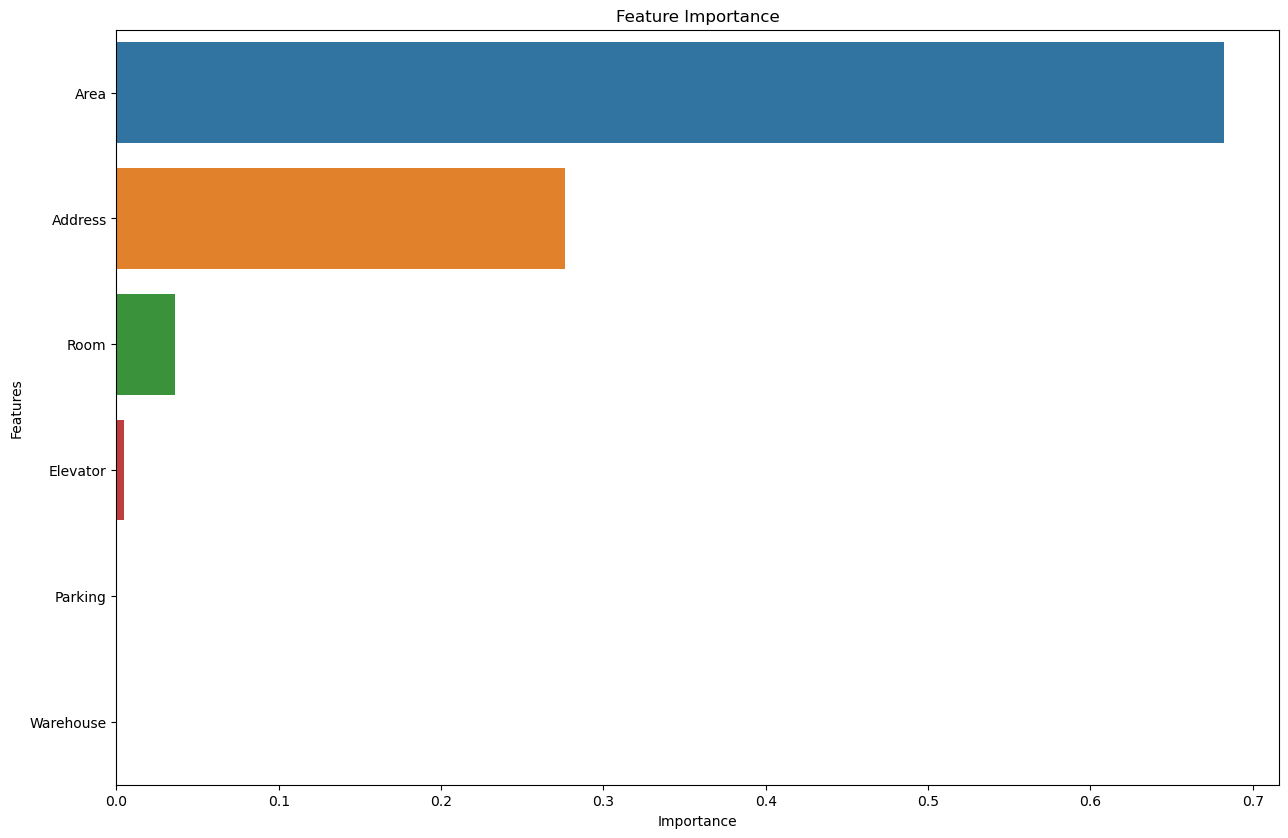

In [14]:
Gboost=GradientBoostingRegressor()
Gboost.fit(X,y)

#create feature importance dataframe
FI_df=pd.DataFrame({'Features': X.columns, 'Importance': Gboost.feature_importances_})
FI_df=FI_df.sort_values(by='Importance', ascending=False).head(100)

#plot feature importance
plt.figure(figsize=(15,10),dpi=100)
sns.barplot(x=FI_df[:30].Importance,y=FI_df[:30].Features,orient = 'h').set_title('Feature Importance')

#### Testing our machine

In [15]:
#Splitting Train dataframe
x_train,x_valid,y_train,y_valid=train_test_split(X, y ,test_size=0.3 , random_state=42)
#Defining model
model=GradientBoostingRegressor(n_estimators= 100, min_samples_split= 26, min_samples_leaf= 17, max_features='auto', max_depth= None)
#Fitting model on train data
model.fit(x_train,y_train)
#predicting validation target
y_pred=model.predict(x_valid)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [16]:
x_valid

,Area,Room,Parking,Warehouse,Elevator,Address
1451,79,2,1,1,1,99
51,150,3,1,1,1,186
567,283,3,1,1,1,185
1612,65,2,1,1,0,78
1164,66,2,1,1,1,70
...,...,...,...,...,...,...
2570,105,2,1,1,1,101
1743,60,1,1,1,1,112
1034,96,2,1,1,1,113
2607,50,0,1,1,1,28


In [17]:
y_pred

array([  91999.54674355,  390552.55806537, 1165824.79036438, ...,
        147448.51923775,   15610.11154272,   82303.25174949])

In [18]:
y_valid

,Price(USD)
1451,86666.67
51,333333.33
567,990000.00
1612,55000.00
1164,52833.33
...,...
2570,151666.67
1743,9833.33
1034,130000.00
2607,11500.00


In [19]:
r2 = r2_score(y_valid,y_pred)
test_r2=r2

In [20]:
y_pred=Gboost.predict(x_valid)

In [21]:
r2 = r2_score(y_valid,y_pred)
model_r2=r2

In [22]:
print("""
The Model r^2 score in testing dataset is: %.2f
The whole model r^2 score is: %.2f
""" %(test_r2, model_r2))


The Model r^2 score in testing dataset is: 0.81
The whole model r^2 score is: 0.93



In [23]:
# I used Dollar because it's more reliable over the time

In [24]:
q = True 
while q:   
    neighborhood = input("Enter Your neighborhood: ")
    if neighborhood in area2num:
        q = False
    else:
        print("Not supported try again please!!!")
        q1=input("Do you wnat to see the list of supported neighbors?(y/n): ").lower()
        ch1 = True
        while ch1:
            if q1 == 'y' or q1 == 'n':
                ch1 = False
            else:
                q1=input("(y/n): ")
        if q1 == 'y':
            for key in area2num:
                print (key)
Address = area2num[neighborhood]
Area = int(input("Enter Your House Area : "))
Room = int(input("Enter the number of rooms: "))
Parkingq = (input("Does your house have a parking lot?(y/n): ")).lower()
if Parkingq == 'y':
    Parking = 1
if Parkingq == 'n':
    Parking = 0
Warehouseq = (input("Does your house have a Warehouse?(y/n): ")).lower()
if Warehouseq == 'y':
    Warehouse = 1
if Warehouseq == 'n':
    Warehouse = 0
Elevatorq = (input("Does your house have a Elevator?(y/n): ")).lower()
if Elevatorq == 'y':
    Elevator = 1
if Elevatorq == 'n':
    Elevator = 0

new_data = [[Area, Room, Parking, Warehouse, Elevator, Address]]
answer = Gboost.predict(new_data)
answer = float(answer)
print(f"The House Price Is About %.2f $ and {int(dollor2toman(answer))} toman" % answer )

Enter Your neighborhood: Zargandeh
Enter Your House Area : 120
Enter the number of rooms: 2
Does your house have a parking lot?(y/n): y
Does your house have a Warehouse?(y/n): y
Does your house have a Elevator?(y/n): y
The House Price Is About 226592.42 $ and 6319889220 toman
